In [32]:
# import all dependency
import cv2   # computer vision
import pytesseract  # convert image to text
from matplotlib import pyplot as plt
import numpy as np
# to install
# pip install opencv-python
# pip install pytesseract

# Load
load the image from folder

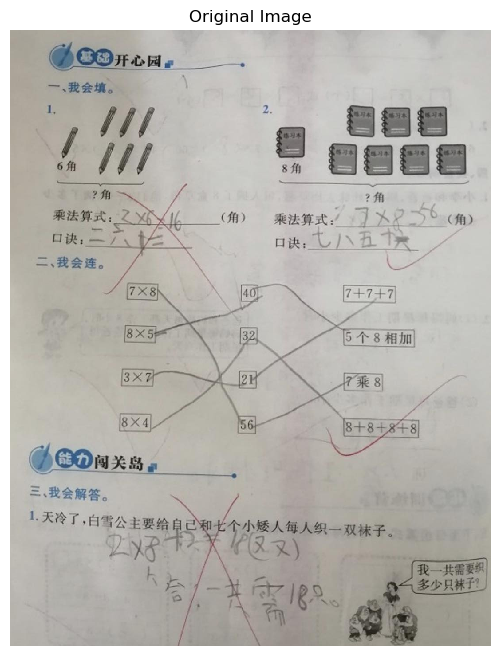

In [33]:
# Step 1: Load the image from a folder
image_path = 'example/1.jpg'
image = cv2.imread(image_path)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# Pre-process image
clean the image 

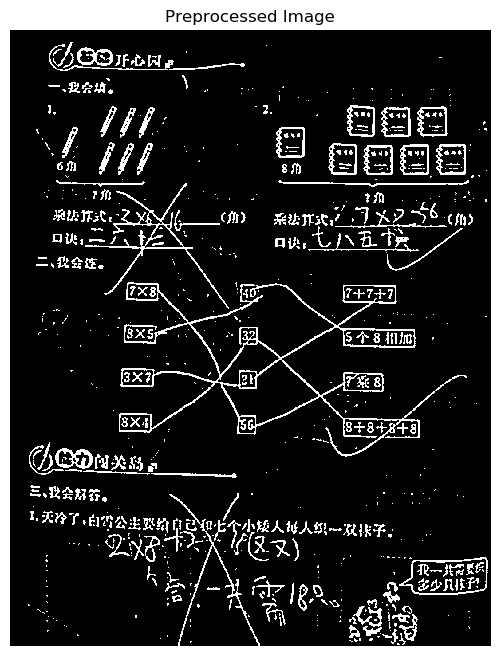

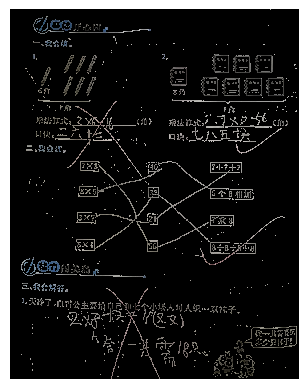

In [34]:
# Step 2: Preprocess the image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve OCR accuracy
blurred_image = cv2.GaussianBlur(gray_image, (11, 11), 0)

# Apply adaptive thresholding to segment the text from the background
thresholded_image = cv2.adaptiveThreshold(
    blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2
)



# Display the preprocessed image
plt.figure(figsize=(8, 8))
plt.imshow(thresholded_image, cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')
plt.show()


filtered_image = cv2.bitwise_and(image, image, mask=thresholded_image)

plt.figure()
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Select the ROI
find the interested area indicated by the red x

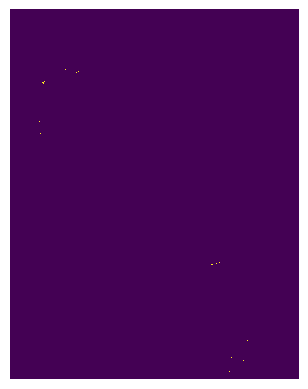

In [35]:
# Step 3: Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds of the red color range for the "X" marks
lower_red1 = np.array([0, 70, 50])
upper_red1 = np.array([30, 255, 255])

lower_red2 = np.array([150, 70, 50])
upper_red2 = np.array([180, 255, 255])

# Create a mask to isolate red regions
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = red_mask1 | red_mask2

filtered_image = cv2.bitwise_and(image, image, mask=red_mask)

plt.figure()
plt.imshow(red_mask)
plt.axis('off')
plt.show()

# Find contours in the red mask
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract ROIs based on the detected contours
detected_x_rois = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Filter out small detections (to avoid noise)
    if w > 10 and h > 10:
        detected_x_roi = image[y:y+h, x:x+w]
        detected_x_rois.append(detected_x_roi)

# Display the detected "X" mark ROIs
for idx, roi in enumerate(detected_x_rois):
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected 'X' Mark ROI {idx+1}")
    plt.axis('off')
    plt.show()

# Convert image to text
use pytesseract to convert the text

In [37]:
# pytesseract.pytesseract.tesseract_cmd = './.local/lib/python3.8/site-packages'

# # Step 4: Use Tesseract to extract text from the preprocessed image
output_file_path = './document.txt'
extracted_text = pytesseract.image_to_string(thresholded_image)
print("Extracted Text:")
print(extracted_text)

# with open(output_file_path, 'w') as output_file:
#     extracted_text = pytesseract.image_to_string(thresholded_image)
#     print("Extracted Text:")
#     print(extracted_text)
#     output_file.write(f"Question:\n{extracted_text}\n\n")


# Step 4: Extract and save the ROIs into a document
# with open(output_file_path, 'w') as output_file:
#     for idx, roi in enumerate(detected_rois):
#         roi_text = pytesseract.image_to_string(roi)
#         output_file.write(f"Question {idx+1}:\n{roi_text}\n\n")

# print(f"Scanned questions saved to {output_file_path}")

TesseractNotFoundError: ./.local/lib/python3.8/site-packages is not installed or it's not in your PATH. See README file for more information.